In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import os
import copy
import seaborn as sns
#  os.chdir(r"D:\STUDY\MS\DATS 6103 Data Mining\project")
# print(os.curdir)
raw_data = pd.read_csv("Global_Superstore2.csv",encoding="latin-1")

In [16]:
import os

# Get the directory where the Jupyter Notebook homepage is located
notebook_home_dir = os.path.expanduser("~/Mining")

# Change the current working directory to the notebook homepage directory
os.chdir(notebook_home_dir)

# Print the current working directory to verify the change
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\91914\Mining


In [18]:
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [19]:

selected_features = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]

sub1 = raw_data[selected_features]
subset = raw_data[selected_features]

In [21]:
raw_data.info

<bound method DataFrame.info of        Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-

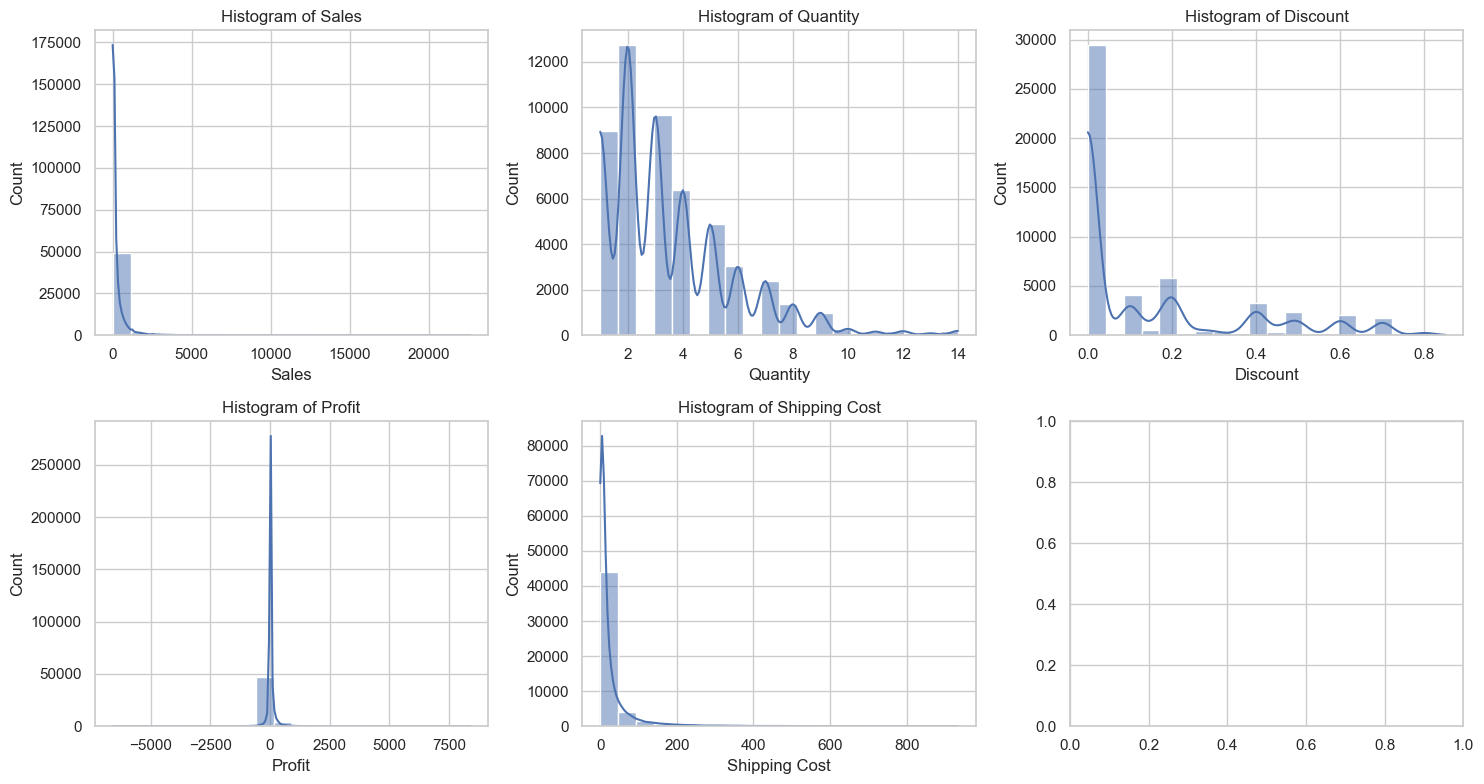

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#-----------------HISTOGRAMS----------------------------

# Set the style of seaborn
sns.set(style="whitegrid")

# Select features for the histograms
selected_features = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(selected_features):
    sns.histplot(raw_data[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()


In [23]:
subset2 = copy.deepcopy(subset)

scaler = StandardScaler()

scaler.fit_transform(subset2)

array([[ 4.2315958 ,  1.54622665, -0.67320984,  4.20773534, 15.83339501],
       [ 7.10251067,  2.42390309, -0.20212916, -1.82045031, 15.65991069],
       [10.10885692,  2.42390309, -0.20212916,  5.11278959, 15.51784204],
       ...,
       [-0.45854931, -0.20912622, -0.67320984, -0.09969172, -0.46016829],
       [-0.47799305, -0.64796444, -0.67320984, -0.15034468, -0.46034282],
       [-0.37966681, -0.20912622, -0.67320984, -0.15378625, -0.46034282]])

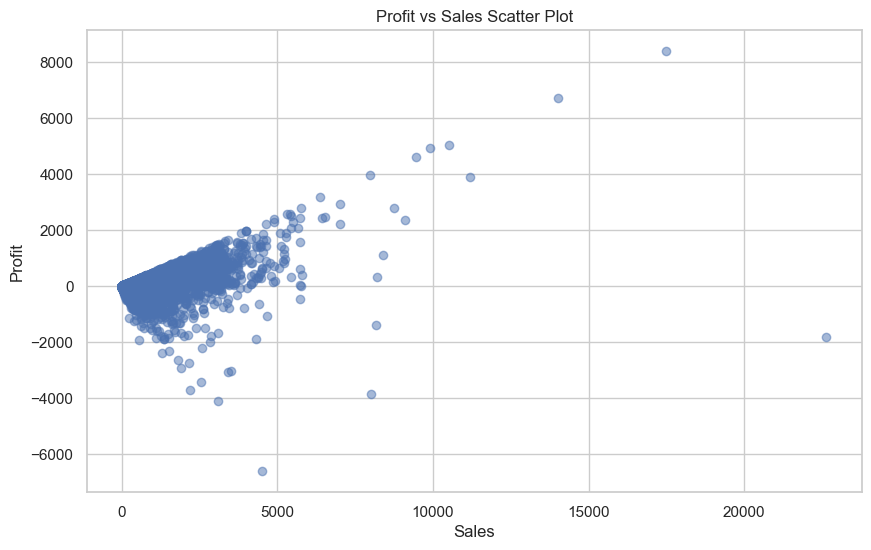

In [24]:

# Scatter plot of Profit vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(subset["Sales"], subset["Profit"], alpha=0.5, color='b')

# Add labels and title
plt.title('Profit vs Sales Scatter Plot')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Show the plot
plt.show()


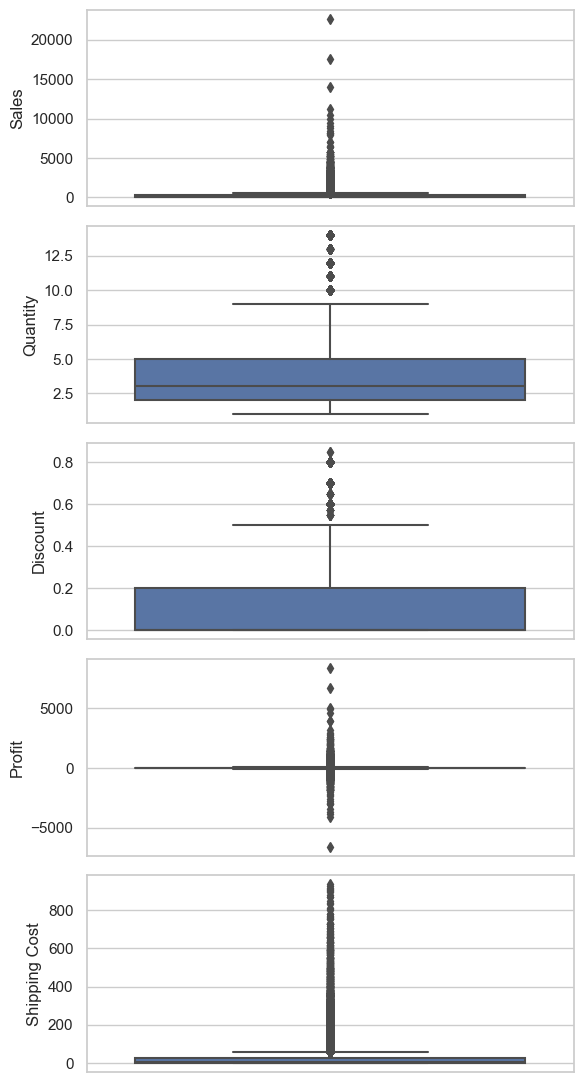

In [25]:
#-------------------BOXPLOTS-----------------------

# Set the style of seaborn
sns.set(style="whitegrid")

# Select features for the boxplots
selected_features = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]

# Create subplots for each feature
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 11))

# Plot vertical boxplots for each feature
for i, feature in enumerate(selected_features):
    sns.boxplot(y=raw_data[feature], ax=axes[i])
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel("")  # Remove x-axis label for better layout

# Adjust layout
plt.tight_layout()
plt.show()



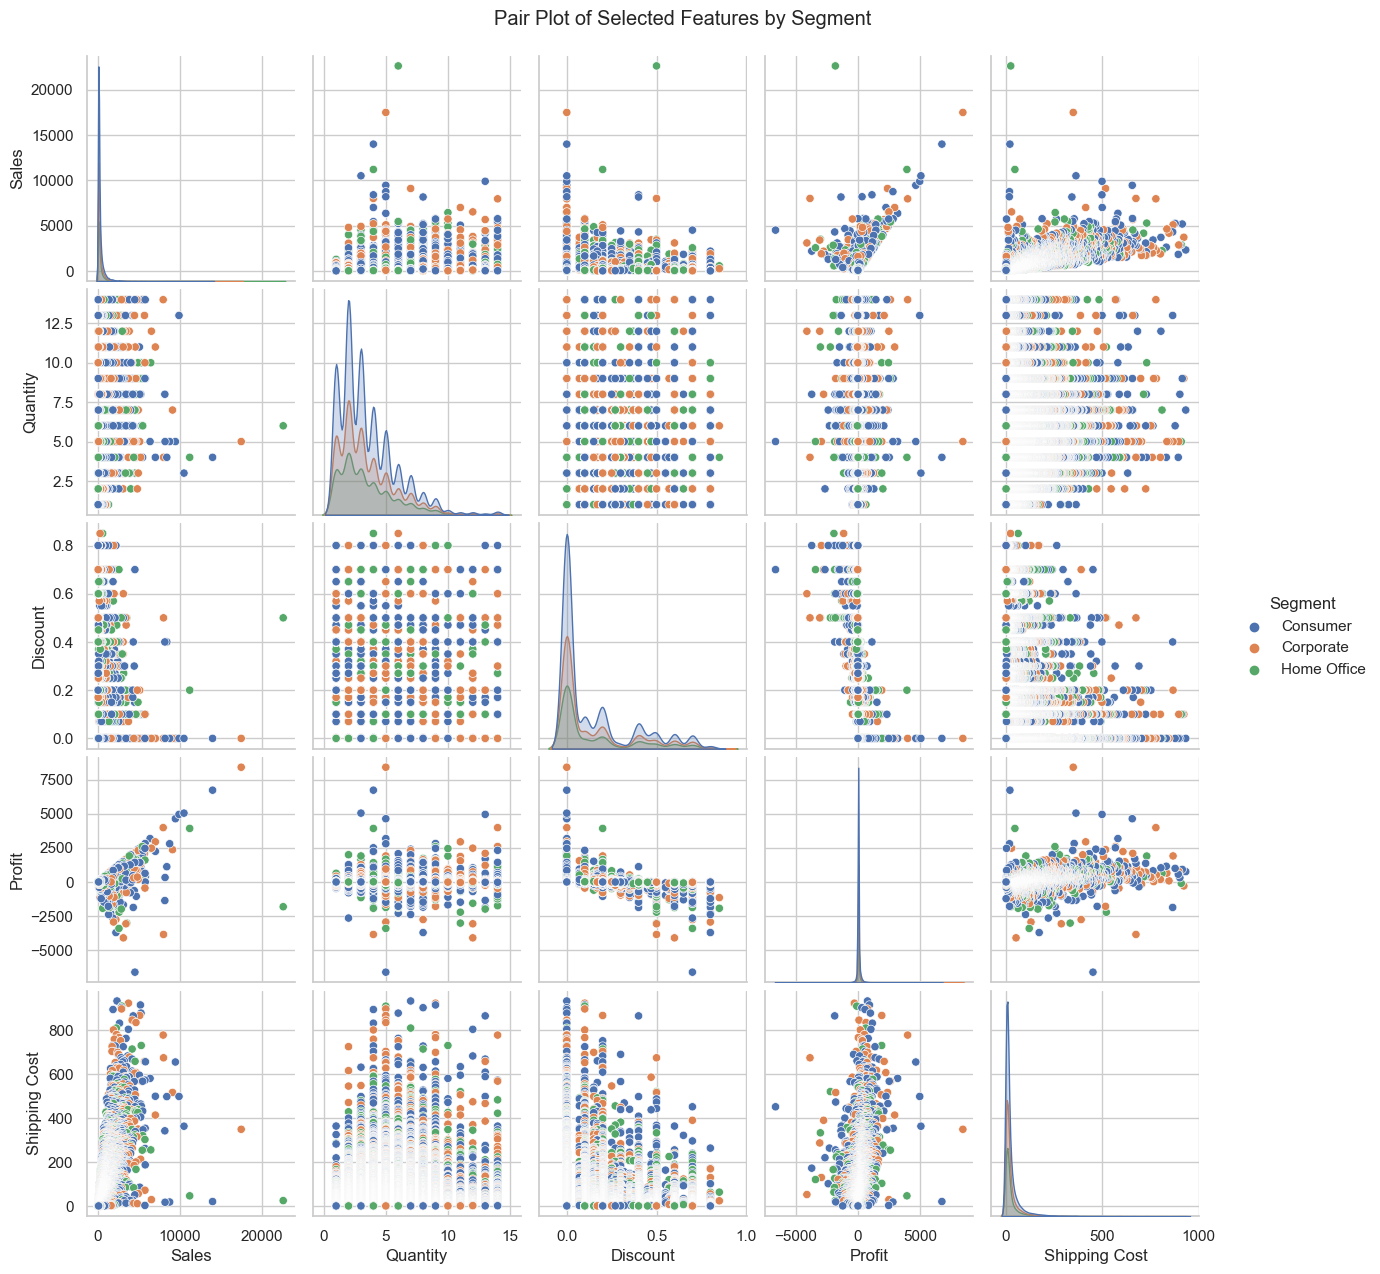

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Segment' is a categorical variable in your dataset
segmented_data = raw_data.copy()  # Copy your data to avoid modifying the original dataset

# Create a pair plot to explore relationships between selected features within each segment
sns.pairplot(segmented_data, hue="Segment", vars=selected_features)
plt.suptitle('Pair Plot of Selected Features by Segment', y=1.02)
plt.show()
